In [1]:
!pip install python-barcode[images]
!pip install qrcode
!apt install libzbar0
!pip install pyzbar

import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 8.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40400 sha256=5b611f35b8bab399c5adce72b886b0a34b6e804f610c6a2c296ee56404574141
  Stored in directory: /root/.cache/pip/wheels/35/fd/04/2768886c56207acee0d6dc6b9bd5d06dac63a810f0c0a42516
Successfully built qrcode
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 n

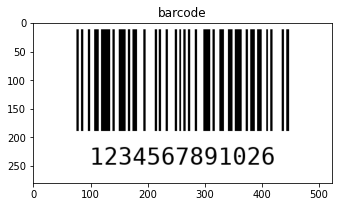

In [ ]:
from barcode import EAN13
from barcode.writer import ImageWriter

with open('barcode.png', 'wb') as f:
  EAN13('123456789102', writer=ImageWriter()).write(f)

barcode = cv2.imread('barcode.png')
imshow('barcode', barcode)

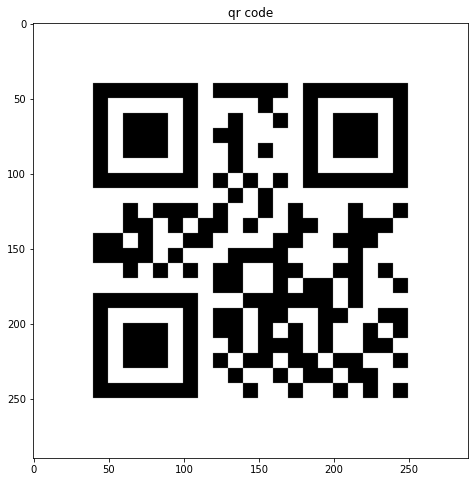

In [2]:
import qrcode 
from PIL import Image

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

qr.add_data("9845888478")
qr.make(fit=True)
img = qr.make_image(gill_color="black", back_color='white')
img.save("qrcode.png")

qrcode = cv2.imread('qrcode.png')
imshow('qr code', qrcode, size = 8)

In [ ]:
from pyzbar.pyzbar import decode
from PIL import Image

img = Image.open('qrcode.png')
result = decode(img)
for i in result:
  print(i.data.decode('utf-8'))

https://wwww.opencv.org


In [ ]:
!wget https://i.stack.imgur.com/1DwED.jpg

--2022-11-03 10:59:42--  https://i.stack.imgur.com/1DwED.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.28.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.28.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439449 (429K) [image/jpeg]
Saving to: ‘1DwED.jpg’

1DwED.jpg           100%[===================>] 429.15K  --.-KB/s    in 0.006s  

2022-11-03 10:59:42 (71.5 MB/s) - ‘1DwED.jpg’ saved [439449/439449]



[Point(x=558, y=938), Point(x=588, y=1288), Point(x=917, y=1276), Point(x=875, y=896)]
QR Code revealed: http://ruthenus.pl (QRCODE)


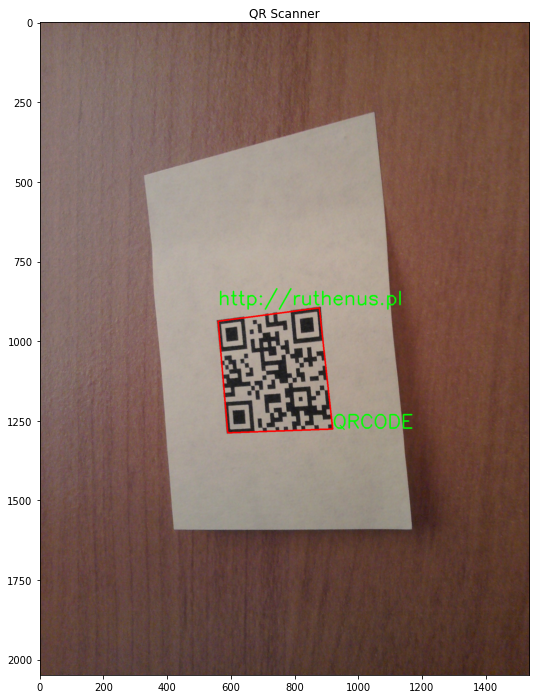

In [ ]:
from pyzbar.pyzbar import decode

image = cv2.imread("/content/1DwED.jpg")

codes = decode(image)

for bc in codes:
  (x,y,w,h) = bc.rect
  print(bc.polygon)
  pt1,pt2,pt3,pt4 = bc.polygon

  pts = np.array( [[pt1.x,pt1.y], [pt2.x,pt2.y], [pt3.x,pt3.y], [pt4.x,pt4.y]], np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(image, [pts], True, (0,0,255), 3)

  barcode_text = bc.data.decode()
  barcode_type = bc.type

  text = "{} ({})".format(barcode_text, barcode_type) 
  cv2.putText(image, barcode_text, (x,y -10),cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),3)
  cv2.putText(image, barcode_type, (x+w,y+h -15),cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),3)
  print("QR Code revealed: {}".format(text))

imshow("QR Scanner", image, size = 12)

In [ ]:
!wget https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg

--2022-11-03 11:01:03--  https://www.differencebetween.com/wp-content/uploads/2011/04/1024px-ISBN.jpg
Resolving www.differencebetween.com (www.differencebetween.com)... 104.21.75.79, 172.67.217.144, 2606:4700:3036::6815:4b4f, ...
Connecting to www.differencebetween.com (www.differencebetween.com)|104.21.75.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79365 (78K) [image/jpeg]
Saving to: ‘1024px-ISBN.jpg’

1024px-ISBN.jpg     100%[===================>]  77.50K  --.-KB/s    in 0.002s  

2022-11-03 11:01:03 (38.3 MB/s) - ‘1024px-ISBN.jpg’ saved [79365/79365]



Barcode revealed: 9780863815805
Barcode revealed: 9780863815805


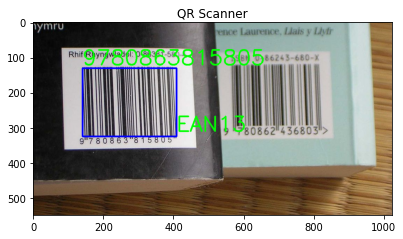

In [ ]:
from pyzbar.pyzbar import decode

image = cv2.imread("/content/1024px-ISBN.jpg")

codes = decode(image)

for bc in codes:
  (x,y,w,h) = bc.rect
  cv2.rectangle(image, (x,y), (x + w ,y + h), (255,0,0),3)

  barcode_text = bc.data.decode()
  barcode_type = bc.type

  text = "{} ({})".format(barcode_text, barcode_type) 
  cv2.putText(image, barcode_text, (x,y -10),cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),3)
  cv2.putText(image, barcode_type, (x+w,y+h -15),cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0),3)
  print("Barcode revealed: {}".format(barcode_text))
  print("Barcode revealed: {}".format(barcode_text))

imshow("QR Scanner", image, size = 12)